In [ ]:
!pip install keras

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

#Data Preprocessing
All columns that are not in the "d_[feature]" format are dropped from our dataframe. We then proceed to iterate through each column of our data. For each unique value in the column that is a string, we use regex to extract numeric values from the string, then convert these numeric strings to integers and calculates the mean of the resulting array of integers. Finally, we replace the original string value in the data frame with the calculated mean. We proceed to normalize and then standardize the data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import keras_tuner
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('speeddating.csv')
df

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'',21.0,b'male',25.0,26.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',2.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'
8374,b'',21.0,b'male',25.0,24.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Other',b'0',...,b'[0-3]',b'[3-5]',4.0,4.0,b'[0-5]',b'[0-4]',0.0,b'0',b'0',b'0'
8375,b'',21.0,b'male',25.0,29.0,4.0,b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'0',b'0'
8376,b'',21.0,b'male',25.0,22.0,3.0,b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',...,b'[0-3]',b'[3-5]',5.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'


In [ ]:
#Dropping irrelevant columns
dropCols = [col for col in df.columns if not col.startswith('d_')]
newDf = df.drop(columns = dropCols)

In [ ]:
newDf

,d_age,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,...,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
0,6.0,b'[4-6]',b'[2-5]',b'[2-5]',b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
1,1.0,b'[0-1]',b'[2-5]',b'[2-5]',b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
2,1.0,b'[0-1]',b'[2-5]',b'[2-5]',b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[0-4]'
3,2.0,b'[2-3]',b'[2-5]',b'[2-5]',b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
4,3.0,b'[2-3]',b'[2-5]',b'[2-5]',b'[21-100]',b'[0-15]',b'[16-20]',b'[0-15]',b'[0-15]',b'[16-20]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1.0,b'[0-1]',b'[0-1]',b'[0-1]',b'[0-15]',b'[0-15]',b'[21-100]',b'[16-20]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[5-6]'
8374,1.0,b'[0-1]',b'[0-1]',b'[0-1]',b'[21-100]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[0-4]'
8375,4.0,b'[4-6]',b'[0-1]',b'[0-1]',b'[21-100]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[-1-0]',b'[7-10]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
8376,3.0,b'[2-3]',b'[0-1]',b'[0-1]',b'[0-15]',b'[21-100]',b'[21-100]',b'[0-15]',b'[0-15]',b'[16-20]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[5-6]'


In [ ]:
#Encoding columns to integer values (the average of the range)
for col in newDf:
  uniqueVals = newDf[col].unique()
  for uniqueVal in uniqueVals:
    if (isinstance(uniqueVal, str)):
      myStrs = re.findall('\d+', uniqueVal)
      myInts = np.array([int(myStr) for myStr in myStrs])
      avg = myInts.mean()
      newDf = newDf.replace(uniqueVal, avg)

In [ ]:
newDf.columns

Index(['d_age', 'd_d_age', 'd_importance_same_race',
       'd_importance_same_religion', 'd_pref_o_attractive', 'd_pref_o_sincere',
       'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious',
       'd_pref_o_shared_interests', 'd_attractive_o', 'd_sinsere_o',
       'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o',
       'd_attractive_important', 'd_sincere_important',
       'd_intellicence_important', 'd_funny_important',
       'd_ambtition_important', 'd_shared_interests_important', 'd_attractive',
       'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
       'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner',
       'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
       'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums',
       'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv',
       'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping',
       'd_yoga', 

In [ ]:
#Encoded dataframe
newDf

,d_age,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,...,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
0,6.0,5.0,3.5,3.5,60.5,18.0,18.0,18.0,7.5,7.5,...,9.5,9.5,7.0,2.5,11.000000,2.0,1.5,4.0,7.0,5.5
1,1.0,0.5,3.5,3.5,60.5,7.5,7.5,60.5,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,2.0,1.5,4.0,7.0,5.5
2,1.0,0.5,3.5,3.5,18.0,18.0,18.0,18.0,7.5,7.5,...,9.5,9.5,7.0,2.5,11.000000,2.0,1.5,4.0,7.0,2.0
3,2.0,2.5,3.5,3.5,60.5,7.5,7.5,60.5,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,2.0,1.5,4.0,7.0,5.5
4,3.0,2.5,3.5,3.5,60.5,7.5,18.0,7.5,7.5,18.0,...,9.5,9.5,7.0,2.5,11.000000,2.0,1.5,4.0,7.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1.0,0.5,0.5,0.5,7.5,7.5,60.5,18.0,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,8.5,1.5,4.0,2.5,5.5
8374,1.0,0.5,0.5,0.5,60.5,18.0,7.5,7.5,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,8.5,1.5,4.0,2.5,2.0
8375,4.0,5.0,0.5,0.5,60.5,7.5,60.5,7.5,7.5,7.5,...,9.5,9.5,7.0,2.5,0.500000,8.5,1.5,4.0,7.0,5.5
8376,3.0,2.5,0.5,0.5,7.5,60.5,60.5,7.5,7.5,18.0,...,9.5,9.5,7.0,2.5,11.333333,8.5,1.5,4.0,2.5,5.5


In [ ]:
y = df['match']
print(y)

0       b'0'
1       b'0'
2       b'1'
3       b'1'
4       b'1'
        ... 
8373    b'0'
8374    b'0'
8375    b'0'
8376    b'0'
8377    b'0'
Name: match, Length: 8378, dtype: object


In [ ]:
X = newDf
y = df['match']
#One-hot encoding our y to match and no match
y = pd.get_dummies(y)
y = y.to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scale = MinMaxScaler()
stand = StandardScaler()

#Standardizing and normalzing the data
X = pd.DataFrame(scale.fit_transform(X), columns=X.columns)

X = pd.DataFrame(stand.fit_transform(X), columns=X.columns)

In [ ]:
X

,d_age,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,...,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
0,0.394786,-0.132285,-0.084263,-0.032627,1.313293,-0.199995,-0.509484,-0.151149,-0.384261,-0.422599,...,1.20852,0.925819,0.624132,-0.710105,0.596525,-1.496904,-0.329933,0.229745,0.591243,0.171298
1,-0.693141,-0.736325,-0.084263,-0.032627,1.313293,-0.762624,-1.005883,2.227486,-0.384261,-0.422599,...,1.20852,0.925819,0.624132,-0.710105,0.665778,-1.496904,-0.329933,0.229745,0.591243,0.171298
2,-0.693141,-0.736325,-0.084263,-0.032627,-0.525354,-0.199995,-0.509484,-0.151149,-0.384261,-0.422599,...,1.20852,0.925819,0.624132,-0.710105,0.596525,-1.496904,-0.329933,0.229745,0.591243,-1.199602
3,-0.475556,-0.467863,-0.084263,-0.032627,1.313293,-0.762624,-1.005883,2.227486,-0.384261,-0.422599,...,1.20852,0.925819,0.624132,-0.710105,0.665778,-1.496904,-0.329933,0.229745,0.591243,0.171298
4,-0.257970,-0.467863,-0.084263,-0.032627,1.313293,-0.762624,-0.509484,-0.738812,-0.384261,0.552013,...,1.20852,0.925819,0.624132,-0.710105,0.596525,-1.496904,-0.329933,0.229745,0.591243,0.171298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,-0.693141,-0.736325,-1.094934,-1.045041,-0.979608,-0.762624,1.499748,-0.151149,-0.384261,-0.422599,...,1.20852,0.925819,0.624132,-0.710105,0.665778,1.288618,-0.329933,0.229745,-1.308969,0.171298
8374,-0.693141,-0.736325,-1.094934,-1.045041,1.313293,-0.199995,-1.005883,-0.738812,-0.384261,-0.422599,...,1.20852,0.925819,0.624132,-0.710105,0.665778,1.288618,-0.329933,0.229745,-1.308969,-1.199602
8375,-0.040385,-0.132285,-1.094934,-1.045041,1.313293,-0.762624,1.499748,-0.738812,-0.384261,-0.422599,...,1.20852,0.925819,0.624132,-0.710105,-1.584962,1.288618,-0.329933,0.229745,0.591243,0.171298
8376,-0.257970,-0.467863,-1.094934,-1.045041,-0.979608,2.077310,1.499748,-0.738812,-0.384261,0.552013,...,1.20852,0.925819,0.624132,-0.710105,0.665778,1.288618,-0.329933,0.229745,-1.308969,0.171298


In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
#Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 0)

# Building Our Model

We have a neural network with 12 neurons in the input and hidden layers. Our output layer has 2 neurons for a binary classification. Each layer has a sigmoid activation function. Our SGD optimizer is 0.3 and we compile the model with categorical cross-entropy loss.

In [ ]:
def buildmodel():
  model = Sequential([
        Dense(12, activation = 'sigmoid', input_dim = X.shape[1]),
        Dense(12, activation = 'sigmoid'),
        Dense(12, activation = 'sigmoid'),
        Dense(12, activation = 'sigmoid'),
        Dense(2, activation = 'sigmoid')
    ])

  learning_rate = 0.3
  model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['mse', 'accuracy'])
  return(model)

mymodel = buildmodel()
mymodel.fit(X_train.astype(float), y_train, batch_size = 10, epochs = 100)

Epoch 1/100
503/503 [==============================] - 1s 1ms/step - loss: 0.4662 - mse: 0.1623 - accuracy: 0.8287
Epoch 2/100
503/503 [==============================] - 1s 1ms/step - loss: 0.4660 - mse: 0.1626 - accuracy: 0.8287
Epoch 3/100
503/503 [==============================] - 1s 1ms/step - loss: 0.4619 - mse: 0.1618 - accuracy: 0.8287
Epoch 4/100
503/503 [==============================] - 1s 1ms/step - loss: 0.4133 - mse: 0.1475 - accuracy: 0.8281
Epoch 5/100
503/503 [==============================] - 1s 1ms/step - loss: 0.3590 - mse: 0.1254 - accuracy: 0.8305
Epoch 6/100
503/503 [==============================] - 1s 1ms/step - loss: 0.3549 - mse: 0.1230 - accuracy: 0.8325
Epoch 7/100
503/503 [==============================] - 1s 1ms/step - loss: 0.3499 - mse: 0.1221 - accuracy: 0.8368
Epoch 8/100
503/503 [==============================] - 1s 1ms/step - loss: 0.3452 - mse: 0.1205 - accuracy: 0.8460
Epoch 9/100
503/503 [==============================] - 1s 1ms/step - loss: 0.341

In [ ]:
yhat_test = mymodel.predict(X_test)

53/53 [==============================] - 0s 999us/step


In [ ]:
#Setting up Keras Classifier
estimator = KerasClassifier(model=buildmodel, epochs=100, batch_size=100, verbose=0) #change to 0 before submit
kfold = RepeatedKFold(n_splits = 10, n_repeats = 1)
results = cross_val_score(estimator, X_train, y_train, cv=kfold, n_jobs = 1, scoring='neg_mean_squared_error')
results.mean()

-0.16256207773280637

In [ ]:
history = estimator.fit(X_train, y_train, epochs=100, validation_data=[X_val, y_val], verbose=1)

Epoch 1/100
51/51 [==============================] - 1s 5ms/step - loss: 0.4881 - mse: 0.1721 - accuracy: 0.8136 - val_loss: 0.4280 - val_mse: 0.1610 - val_accuracy: 0.8508
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 0.4595 - mse: 0.1639 - accuracy: 0.8287 - val_loss: 0.4261 - val_mse: 0.1592 - val_accuracy: 0.8508
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 0.4590 - mse: 0.1640 - accuracy: 0.8287 - val_loss: 0.4225 - val_mse: 0.1456 - val_accuracy: 0.8508
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 0.4601 - mse: 0.1634 - accuracy: 0.8287 - val_loss: 0.4233 - val_mse: 0.1559 - val_accuracy: 0.8508
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 0.4596 - mse: 0.1641 - accuracy: 0.8287 - val_loss: 0.4213 - val_mse: 0.1511 - val_accuracy: 0.8508
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 0.4591 - mse: 0.1637 - accuracy: 0.8287 - val_loss: 0.4212 - v

In [ ]:
yhat_test = estimator.predict(X_test.astype(float))

In [ ]:
yhat_train = estimator.predict(X_train.astype(float))

In [ ]:
from keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
yhat_test_enc = to_categorical(np.argmax(yhat_test, axis=1), 2)

In [ ]:
yhat_train_enc = to_categorical(np.argmax(yhat_train, axis=1), 2)

In [ ]:
yhat_test_enc

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# Metrics

In [ ]:
print(classification_report(y_test, yhat_test_enc))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1407
           1       0.49      0.56      0.52       269

   micro avg       0.83      0.83      0.83      1676
   macro avg       0.70      0.72      0.71      1676
weighted avg       0.84      0.83      0.84      1676
 samples avg       0.83      0.83      0.83      1676



In [ ]:
mse_test = mean_squared_error(y_test, yhat_test_enc)
print(mse_test)

0.16587113


In [ ]:
mse_train = mean_squared_error(y_train, yhat_train_enc)
print(mse_train)

0.1241544


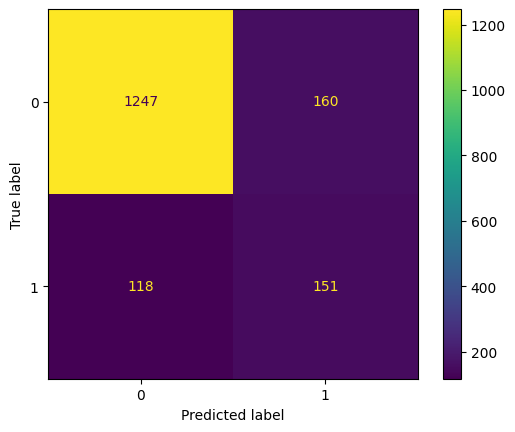

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.argmax(axis=1), yhat_test_enc.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()